<a href="https://colab.research.google.com/github/Jane0731/Homework/blob/main/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A_W6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用Python建立ARIMA模型，預測股票價格，並進行可視化。

In [51]:
!pip install yfinance

In [52]:
!pip install pmdarima

In [53]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [54]:
# 輸入股票代號
stock_id = "2330.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-04-22,740.0,757.0,740.0,742.0,735.861755,46540798
1,2024-04-23,761.0,761.0,752.0,754.0,747.762451,30423647
2,2024-04-24,770.0,785.0,769.0,783.0,776.522583,39457128
3,2024-04-25,770.0,774.0,765.0,766.0,759.663208,28534926
4,2024-04-26,788.0,789.0,782.0,782.0,775.530823,32571247
...,...,...,...,...,...,...,...
115,2024-10-09,1030.0,1035.0,1020.0,1020.0,1020.000000,46975717
116,2024-10-11,1025.0,1050.0,1020.0,1045.0,1045.000000,43058754
117,2024-10-14,1045.0,1055.0,1035.0,1045.0,1045.000000,36858874
118,2024-10-15,1050.0,1075.0,1050.0,1070.0,1070.000000,42850176


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=761.025, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=762.261, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=760.669, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=758.913, Time=1.32 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=760.911, Time=0.51 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=762.646, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=762.533, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=762.828, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=760.116, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=760.912, Time=0.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=761.453, Time=0.19 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=762.364, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=760.998, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=758.307, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] inter

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


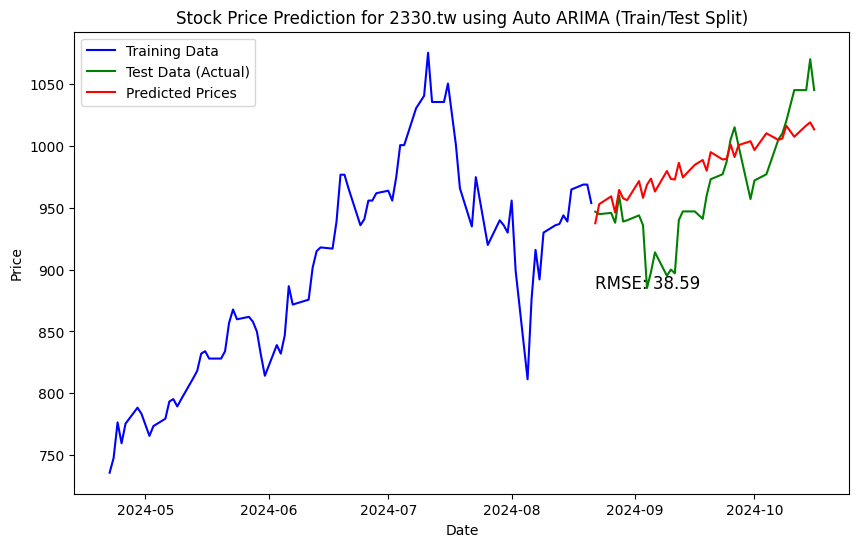

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import pmdarima as pm  # 使用auto_arima进行自动调参
from sklearn.metrics import mean_squared_error



# 确保 'Date' 列是 datetime 类型
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 提取 'Adj Close' 列用于预测
stock_prices = df['Adj Close']

# 分割训练集和测试集
train_size = int(len(stock_prices) * 0.7)
train_data, test_data = stock_prices[:train_size], stock_prices[train_size:]

# 使用 auto_arima 自动调整参数

model_auto = pm.auto_arima(train_data,
        start_p=0, max_p=5,  # p从0开始，最大尝试到5
        start_q=0, max_q=5,  # q从0开始，最大尝试到5
        start_d=0, max_d=2,  # d从0开始，最大尝试到2
        seasonal=False,     # 不考虑季节性
        stepwise=False,      # 使用步进搜索
        trace=True,         # 打印搜索过程
        error_action='ignore',  # 忽略错误
        suppress_warnings=True, # 抑制警告
        m=1,  # m=1表示非季节性
        max_order=10)  # 控制 p+q 最大值不超过10

# 打印选择的最佳参数
print(f'Best ARIMA parameters: {model_auto.order}')

# 使用 auto_arima 选择的最佳参数进行预测
forecast = model_auto.predict(n_periods=len(test_data))

# 计算均方误差（MSE）和均方根误差（RMSE）
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 可视化结果
plt.figure(figsize=(10, 6))

# 绘制训练集的真实值
plt.plot(train_data.index, train_data, label='Training Data', color='blue')

# 绘制测试集的真实值
plt.plot(test_data.index, test_data, label='Test Data (Actual)', color='green')

# 绘制预测的值
forecast_index = test_data.index
plt.plot(forecast_index, forecast, label='Predicted Prices', color='red')

# 在图中显示 RMSE
plt.text(forecast_index[0], min(test_data), f'RMSE: {rmse:.2f}', fontsize=12, color='black')


# 添加图表标签和标题
plt.title(f'Stock Price Prediction for {stock_id} using Auto ARIMA (Train/Test Split)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# 显示图表
plt.show()

# 使用Python設計一個量化交易策略，並使用歷史資料進行回測。

策略說明：動量策略



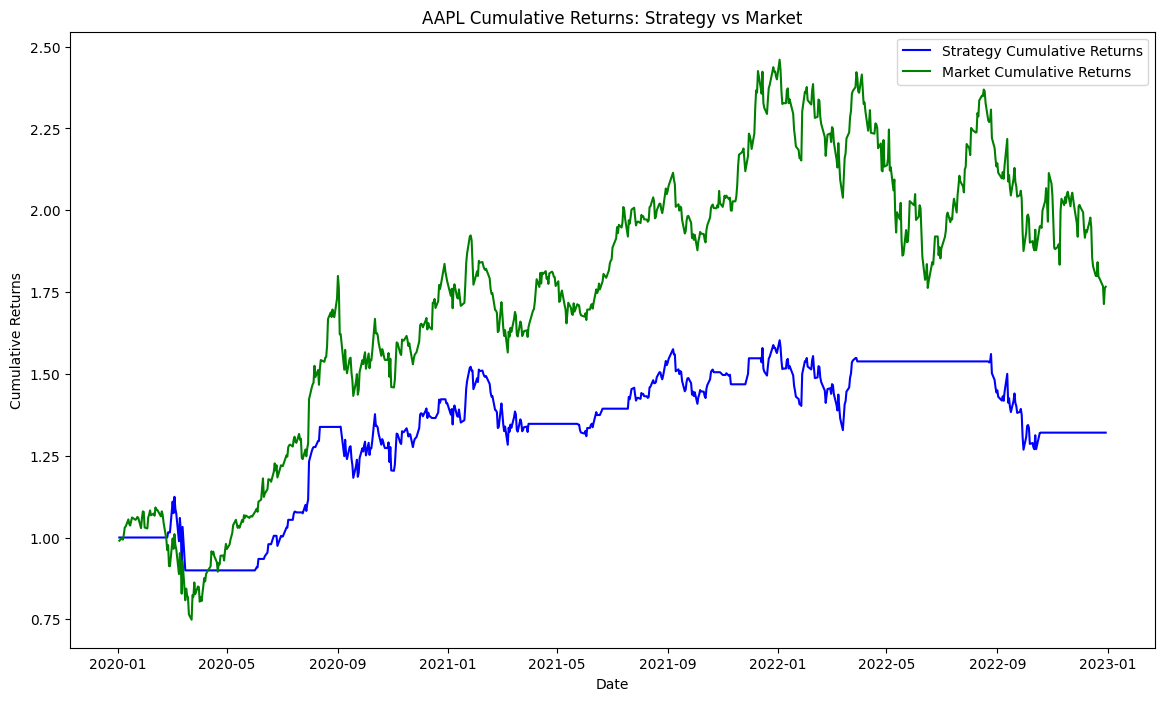

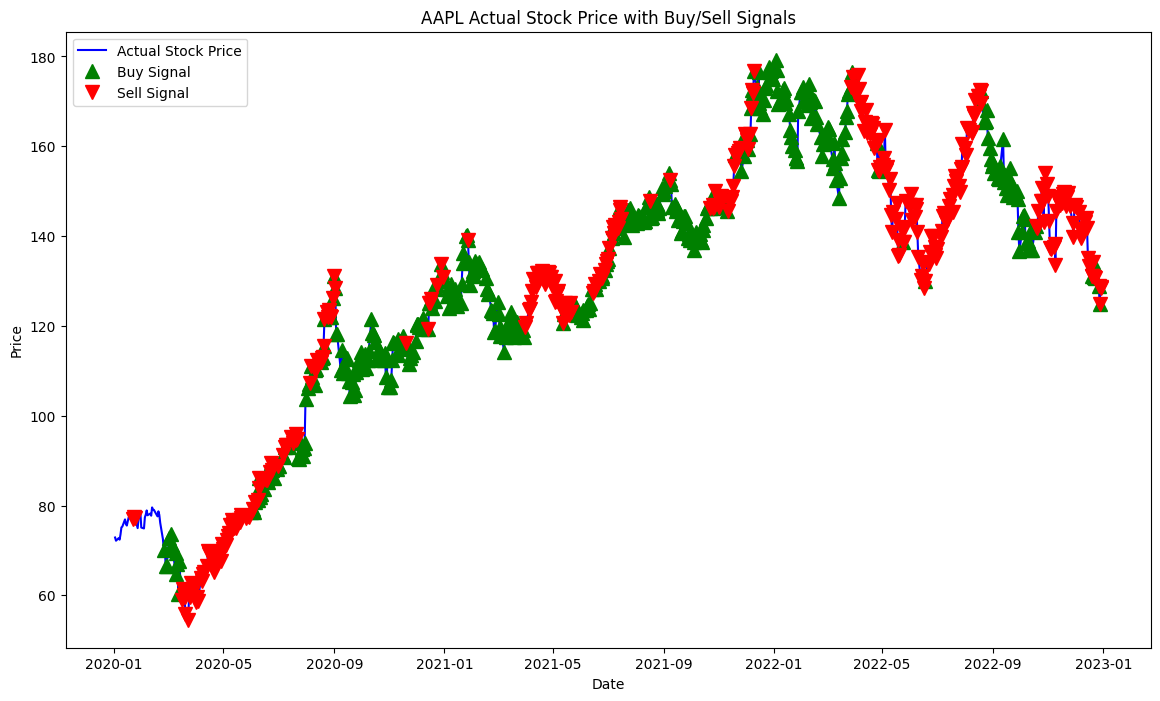

Cumulative Strategy Return: 32.05%
Cumulative Market Return: 76.63%


In [61]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. 計算 RSI (14天窗口)
window_length = 14

# 獲取每日的價格變化
delta = df['Adj Close'].diff()

# 分為漲跌兩部分
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()

# 計算RSI
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# 2. 計算移動平均線 (SMA40 和 SMA100)
short_window = 40  # 短期均線
long_window = 100  # 長期均線

df['SMA40'] = df['Adj Close'].rolling(window=short_window, min_periods=1).mean()
df['SMA100'] = df['Adj Close'].rolling(window=long_window, min_periods=1).mean()

# 3. 生成交易信號
# 買入信號: RSI < 30 或者 SMA40 上穿 SMA100
df['Buy'] = np.where((df['RSI'] < 30) | (df['SMA40'] > df['SMA100']), 1, 0)
# 賣出信號: RSI > 70 或者 SMA40 下穿 SMA100
df['Sell'] = np.where((df['RSI'] > 70) | (df['SMA40'] < df['SMA100']), -1, 0)

# 4. 創建持倉
df['Position'] = 0  # 初始化持倉
df['Position'] = np.where(df['Buy'] == 1, 1, df['Position'])  # 買入時持倉
df['Position'] = np.where(df['Sell'] == -1, 0, df['Position'])  # 賣出時平倉
df['Position'] = df['Position'].shift()  # 延遲一天實際生效

# 5. 計算投資組合的收益
df['Returns'] = df['Adj Close'].pct_change()  # 計算每日回報率
df['Strategy'] = df['Position'] * df['Returns']  # 策略收益（根據倉位大小乘以每日回報率）
df['Cumulative Returns'] = (1 + df['Strategy']).cumprod()  # 策略累計收益
df['Market Cumulative Returns'] = (1 + df['Returns']).cumprod()  # 市場累計收益

# 6. 可視化策略表現（回報率）
plt.figure(figsize=(14, 8))

# 繪製策略累計回報與市場累計回報
plt.plot(df.index, df['Cumulative Returns'], label='Strategy Cumulative Returns', color='blue')
plt.plot(df.index, df['Market Cumulative Returns'], label='Market Cumulative Returns', color='green')

plt.title(f'{stock_id} Cumulative Returns: Strategy vs Market')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# 7. 可視化實際股價及買賣點
plt.figure(figsize=(14, 8))

# 繪製實際股價
plt.plot(df.index, df['Adj Close'], label='Actual Stock Price', color='blue')

# 標記買入點：使用綠色向上箭頭
buy_signals = df[df['Buy'] == 1]
plt.plot(buy_signals.index, buy_signals['Adj Close'], '^', markersize=10, color='green', label='Buy Signal')

# 標記賣出點：使用紅色向下箭頭
sell_signals = df[df['Sell'] == -1]
plt.plot(sell_signals.index, sell_signals['Adj Close'], 'v', markersize=10, color='red', label='Sell Signal')

plt.title(f'{stock_id} Actual Stock Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 8. 評估策略表現
cumulative_return = df['Cumulative Returns'].iloc[-1] - 1
market_return = df['Market Cumulative Returns'].iloc[-1] - 1
print(f'Cumulative Strategy Return: {cumulative_return:.2%}')
print(f'Cumulative Market Return: {market_return:.2%}')
